<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/FinishedUnit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-64m3ev9u
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-64m3ev9u
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install bambi

In [3]:
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

*No, the elpd_loo would be useless*

**Task2**:

Describe overfitting, in the context of this course

*Overfitting happens when a model is given a lot of data. The model is able to create good predictions according to the data but is unable to predict without new data.*

**Task3**:

How do we mitigate overfitting?

*Using priors because there is uncertainty and they are predictions. Using the smallest number of variables in a model.*

**Task4**:

How do we mitigate underfitting?

*Choosing a model based on hte elpd_loo.*

**Task5**:

Why would we want more than one predictor in a model?

*It can make our model stronger since these two predictors may have a correlation between each other that may affect the result.*

**Task6**:

Can we have too many predictors? How would we now?

*It depends. We can't have too many predictors since it would cause overfitting. We would know by the way the model is predicting, does the model match a lot to the data or does the model is predicting that is outside the data but is still realistic.*

**Task7**:

What is variable selection, and how does it work?

*Variable selection is the process of selecting the best variables, could be either one or multiple variables, in order for the model to work. By choosing a variable, you would run different models with different combinations of all variables. Then check the most reasonable model using the elpd_loo function and see which model has the lowest elpd_loo. In the future, it would be easier to do variable selection using a library named Kulprit. Another way would be creating a diagram of all variables with the outcome and see how the variables are related or in what ways they are connected.*

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Differences
* *Linear regression with two predictors*
  * *Adding to variables when inputing in bambi*
  * *Bambi can give you multiple models based on the variable*
  * *Using the two variables helps find how two variables affect the output/result *

* *Linear Regresion with categorical variable*
  * *Adding variable and position when making the model*
  * *Shows a simple model on how category affects variable*

* *Linear regresion with hierarchy*
  * *Not adding. You are putting variable and category inside parenthesis with a vertical line between both*
  * *Shows a complex relationship between categories and variables*

Similarities
* *Can be modeled by inputing in bambi*
* *Categorical and hierarchical: they use the same model but the output can be different*
* *They all output a linear model*
* *Categorical and hierarchical: need to understand what causes the differences between them*


**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

*We vizualize multiple linear regression models using bambi. Bambi helps in choosing the priors for the model. We can also use elpd_loo function to compare and find the best model. I don't think we can visualize the model all at once. If we are using a variable out of different variables, the variable could be affected by other known variables or unknown variables that the data is not showing. This could affect the model and predictions. On the other hand, putting too much variables in a model would cause overfitting and not seeing the full picture and getting wrong predictions*

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [8]:
#Categorical model (Pos Categorical)
#predictor FT%
#pos as categorical predictor
model_bbCat1 = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)

#fit the model
idata_bbCat1 = model_bbCat1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

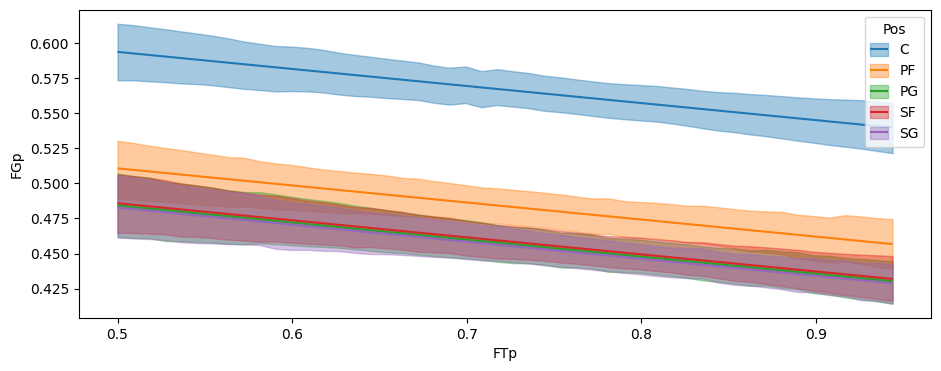

In [9]:
#model_bbCat1
bmb.interpret.plot_predictions(model_bbCat1,
                               idata_bbCat1,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [11]:
#Hierarchical model (Pos hierarchy)
#define the model, but as a hierarchy
model_bbHie2 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_bbHie2 = model_bbHie2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

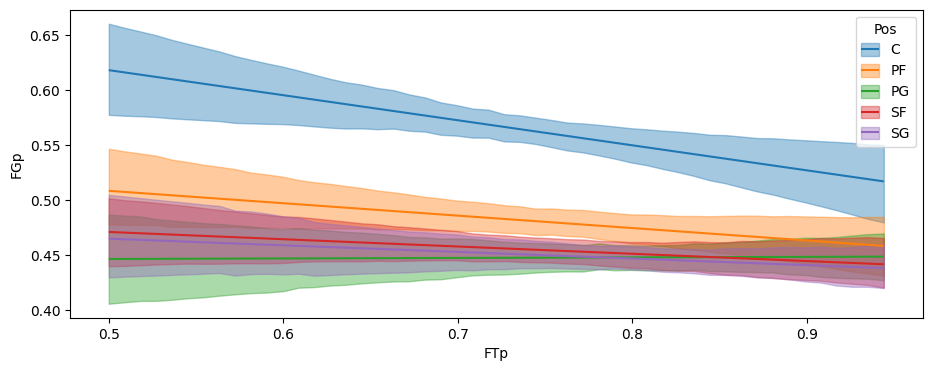

In [13]:
#model_bbHie2
bmb.interpret.plot_predictions(model_bbHie2,
                               idata_bbHie2,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [18]:
#Interactive Model (FT% interaction w/ Pos)
#define the model; bb_interq stands for baskeball interaction quantiative
model_bbInt1 = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)

#create the model
idata_bbInt1 = model_bbInt1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

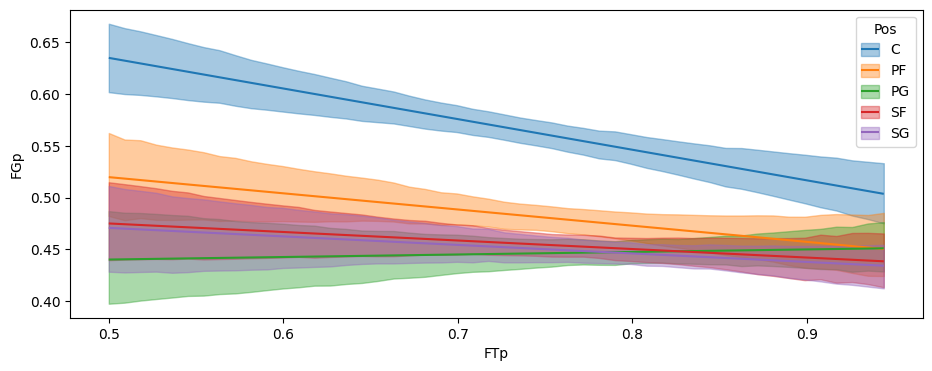

In [20]:
#model_bbInt1
bmb.interpret.plot_predictions(model_bbInt1,
                               idata_bbInt1,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})#,
                               #legend=False)

In [22]:
#Interactive Model 2 (all predictors interactive)
#define the model; bb_interq stands for baskeball interaction quantiative
model_bbInt2 = bmb.Model("`FGp` ~ `FTp` + `Pos` + `3P` + `FTp`:`Pos` + `3P`:`Pos` + `FTp`:`3P`", data=bb)

#create the model
idata_bbInt2 = model_bbInt2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

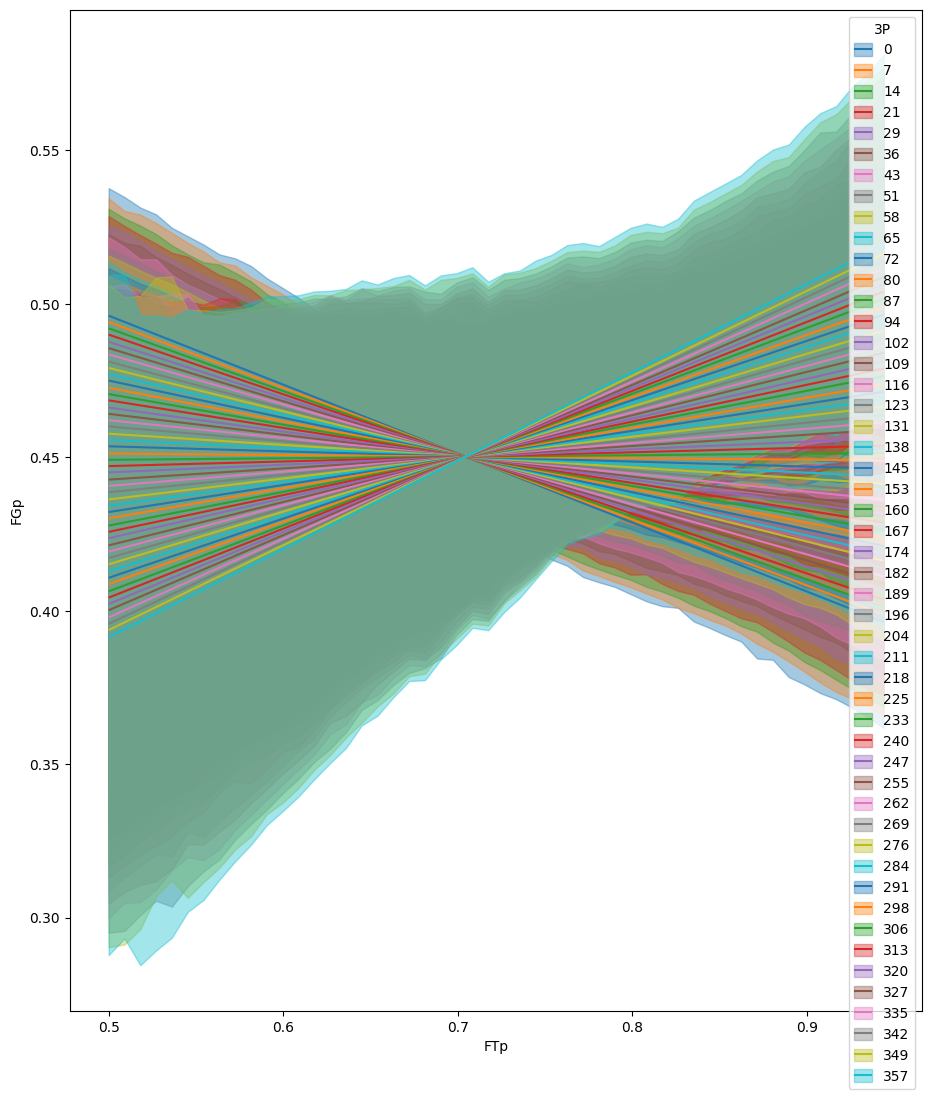

In [33]:
#model_bbInt2
bmb.interpret.plot_predictions(model_bbInt2,
                               idata_bbInt2,
                               ["FTp","3P"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [24]:
#Interactive Model 3 (interaction between 3P and Pos)
#define the model; bb_interq stands for baskeball interaction quantiative
model_bbInt3 = bmb.Model("`FGp` ~ `FTp` + `Pos` + `3P` + `3P`:`Pos`", data=bb)

#create the model
idata_bbInt3 = model_bbInt3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='3P', ylabel='FGp'>], dtype=object))

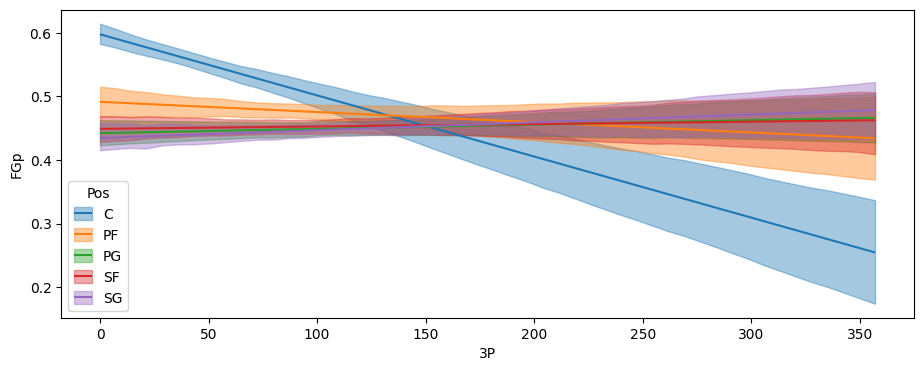

In [31]:
#model_bbInt3
bmb.interpret.plot_predictions(model_bbInt3,
                               idata_bbInt3,
                               ["3P","Pos"],
                               fig_kwargs={"figsize":(11, 4)})#,
                               #legend=False)

In [27]:
#cmp_df stands for compare dataframe
cmp_df = az.compare( {"model_bbCat1":idata_bbCat1,"model_bbHie2":idata_bbHie2,"model_bbInt1":idata_bbInt1, "model_bbInt2":idata_bbInt2, "model_bbInt3":idata_bbInt3})

#0 is the best rank; we want a lower elpd_loo
cmp_df

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_bbInt3,0,528.065403,13.013207,0.000000,5.868483e-01,15.930660,0.000000,False,log
model_bbInt2,1,527.149104,19.032563,0.916299,4.131517e-01,15.154423,3.450464,False,log
model_bbInt1,2,509.005754,14.136908,19.059649,6.818038e-16,16.754159,7.169659,True,log
model_bbHie2,3,508.137079,14.070944,19.928325,0.000000e+00,17.031830,6.817455,False,log
model_bbCat1,4,507.152020,8.470465,20.913383,0.000000e+00,16.069243,6.507270,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

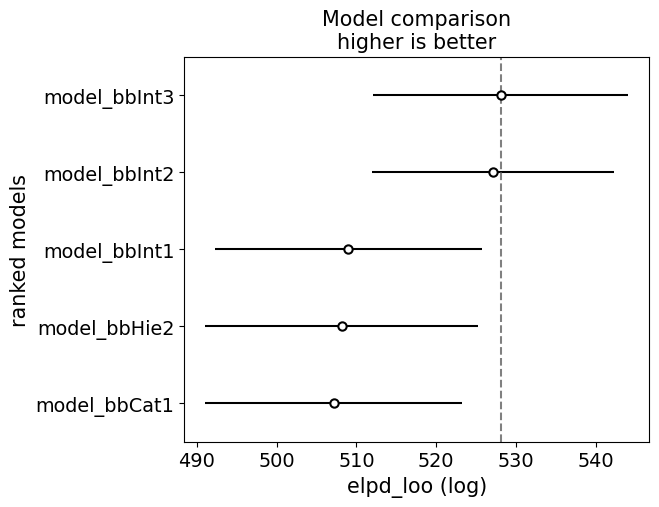

In [28]:
az.plot_compare(cmp_df)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

*According to the elpd_loo model, model_bbInt3 or the model where it shows the interaction between Pos and 3P is the best model. I think because 3P and Position affect the FG%. The output shows how 3P and FG% are different according to position since the slope is different for each position.*